In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [12]:
from google.colab import drive

# Unmount the drive first
drive.flush_and_unmount()
print('Drive unmounted')

# Remove existing files from the mountpoint if it exists
import os
if os.path.exists('/content/drive'):
  !rm -rf '/content/drive'  # Use with caution! This permanently deletes all files in the directory.
  print('Files removed from mountpoint')

# Remount the drive
drive.mount('/content/drive')
print('Drive mounted')

Drive unmounted
Mounted at /content/drive
Drive mounted


In [21]:
data = pd.read_csv('/content/drive/Shareddrives/Machine_Learning_Project_Drive/Audio_Features/all_audio_features_modified.csv')

Identifying Genre:


<ipython-input-20-a4f090454379>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="tempo", data=data, palette='husl')


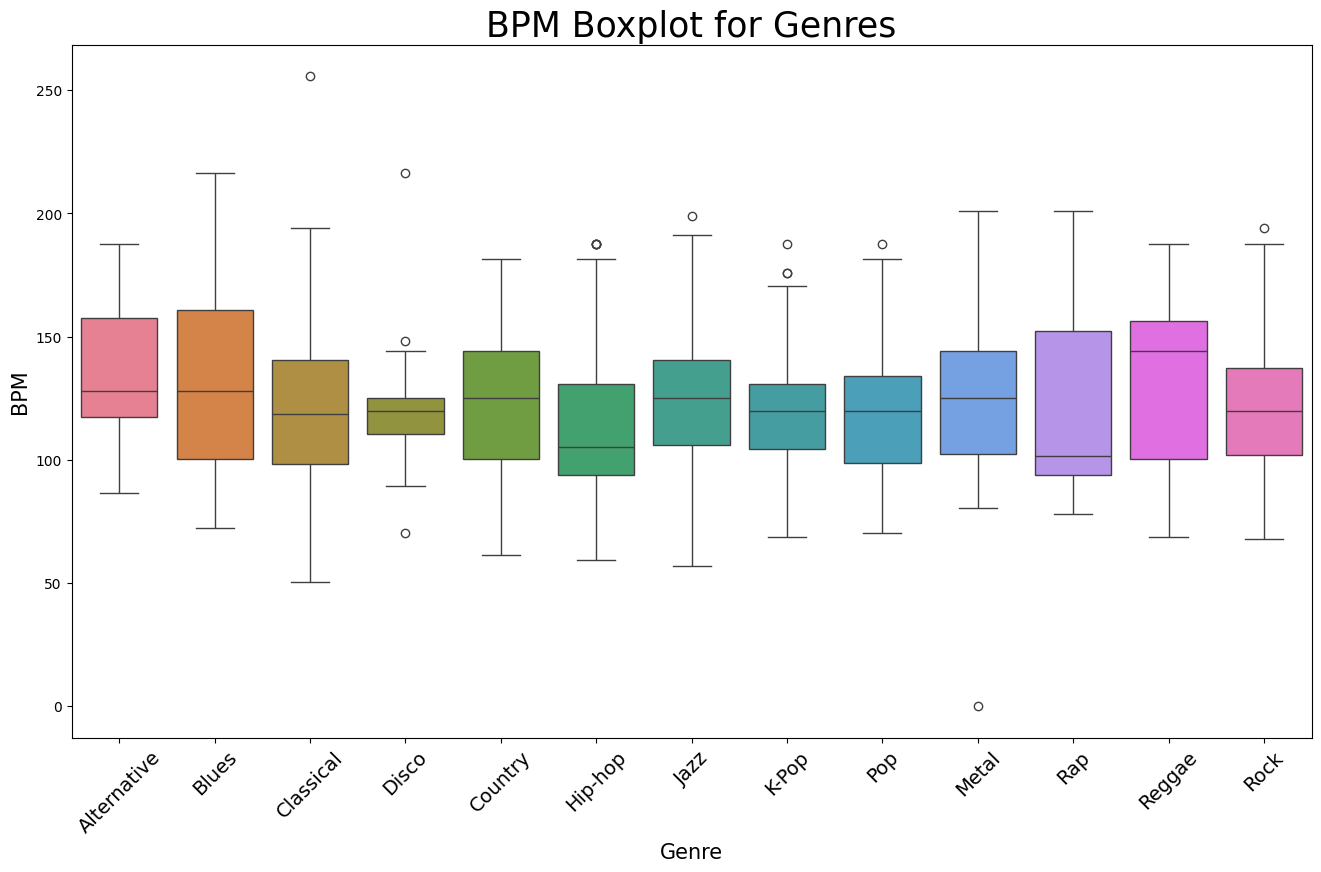

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
f, ax = plt.subplots(figsize=(16, 9))

# Generate the boxplot for tempo by genre
sns.boxplot(x="genre", y="tempo", data=data, palette='husl')

# Add title and labels
plt.title('BPM Boxplot for Genres', fontsize=25)
plt.xticks(fontsize=14, rotation=45)  # Rotating x-ticks for better readability
plt.yticks(fontsize=10)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)

# Save the plot to a file
plt.savefig("BPM Boxplot.jpg")

# Show the plot
plt.show()


In [14]:
y = data['genre'] # genre variable.
X = data.drop(columns=['genre', 'song_name']) #select all columns but not the labels

# Encode the genre labels as numeric values
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'y_encoded' now contains numeric labels

# Save the mapping of numeric labels to original genre names
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Normalize the feature matrix X
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=X.columns)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

In [22]:
# Define the model_assess function
def model_assess(model, model_name):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy {model_name}: {accuracy:.5f}")

Checking model evaluations:

In [19]:
# Model evaluations

# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decision Trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decision Trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs')
model_assess(lg, "Logistic Regression")

# Neural Networks
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes: 0.45968
Accuracy Stochastic Gradient Descent: 0.50806
Accuracy KNN: 0.47984
Accuracy Decision Trees: 0.32661
Accuracy Random Forest: 0.49597
Accuracy Support Vector Machine: 0.49597


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression: 0.50806


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets: 0.53226
Accuracy Cross Gradient Booster: 0.52823
Accuracy Cross Gradient Booster (Random Forest): 0.51210


Checking with different parameters:

In [23]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Define parameter grids for each model
param_grids = {
    'Naive Bayes': {},
    'Stochastic Gradient Descent': {
        'max_iter': [1000, 5000],
        'alpha': [0.0001, 0.001, 0.01],
        'penalty': ['l2', 'l1', 'elasticnet']
    },
    'KNN': {
        'n_neighbors': [5, 10, 15, 19],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Decision Trees': {
        'max_depth': [10, 20, 30, 40],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Machine': {
        'C': [1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly'],
        'decision_function_shape': ['ovo', 'ovr']
    },
    'Logistic Regression': {
        'solver': ['lbfgs', 'liblinear'],
        'C': [0.1, 1, 10]
    },
    'Neural Nets': {
        'solver': ['lbfgs', 'adam'],
        'alpha': [1e-5, 1e-4, 1e-3],
        'hidden_layer_sizes': [(100,), (5000, 10)]
    },
    'Cross Gradient Booster': {
        'n_estimators': [100, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1]
    },
    'Cross Gradient Booster (Random Forest)': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 6, 9],
        'min_child_weight': [1, 3, 5]
    }
}

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Stochastic Gradient Descent': SGDClassifier(random_state=0),
    'KNN': KNeighborsClassifier(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(random_state=0),
    'Neural Nets': MLPClassifier(random_state=1),
    'Cross Gradient Booster': XGBClassifier(),
    'Cross Gradient Booster (Random Forest)': XGBRFClassifier()
}

# Function to perform GridSearchCV for the best parameters
def find_best_params(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Find the best parameters for each model
best_params = {}
for model_name, model in models.items():
    print(f"Finding best parameters for {model_name}:")
    best_params[model_name] = find_best_params(model, param_grids[model_name], X_train, y_train)
    print(f"Best parameters for {model_name}: {best_params[model_name]}")

# Function to evaluate models using MSE, MAE, and R²
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, mae, r2

# Update the evaluation script with the best parameters
for model_name, params in best_params.items():
    model = models[model_name].set_params(**params)
    model.fit(X_train, y_train)
    val_mse, val_mae, val_r2 = evaluate_model(model, X_val, y_val)
    print(f"{model_name} Validation - MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")

# Example model assessment function
def model_assess(model, model_name):
    model.fit(X_train, y_train)
    test_mse, test_mae, test_r2 = evaluate_model(model, X_test, y_test)
    print(f"{model_name} Test - MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Evaluate each model with the best parameters
for model_name, model in models.items():
    model_assess(model, model_name)

Finding best parameters for Naive Bayes:
Best parameters for Naive Bayes: {}
Finding best parameters for Stochastic Gradient Descent:
Best parameters for Stochastic Gradient Descent: {'alpha': 0.01, 'max_iter': 1000, 'penalty': 'l2'}
Finding best parameters for KNN:
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
Finding best parameters for Decision Trees:
Best parameters for Decision Trees: {'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20}
Finding best parameters for Random Forest:
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Finding best parameters for Support Vector Machine:
Best parameters for Support Vector Machine: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}
Finding best parameters for Logistic Regression:
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Finding best parameters for Neur

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Nets: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Finding best parameters for Cross Gradient Booster:
Best parameters for Cross Gradient Booster: {'learning_rate': 0.1, 'n_estimators': 100}
Finding best parameters for Cross Gradient Booster (Random Forest):
Best parameters for Cross Gradient Booster (Random Forest): {'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 500}
Naive Bayes Validation - MSE: 18.7366, MAE: 2.6075, R²: -0.5811
Stochastic Gradient Descent Validation - MSE: 17.3710, MAE: 2.4785, R²: -0.4659
KNN Validation - MSE: 18.3817, MAE: 2.6183, R²: -0.5512
Decision Trees Validation - MSE: 17.4570, MAE: 2.7043, R²: -0.4732
Random Forest Validation - MSE: 16.9301, MAE: 2.3602, R²: -0.4287
Support Vector Machine Validation - MSE: 17.8602, MAE: 2.4516, R²: -0.5072
Logistic Regression Validation - MSE: 16.2473, MAE: 2.4086, R²: -0.3711


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Nets Validation - MSE: 15.4409, MAE: 2.3011, R²: -0.3030
Cross Gradient Booster Validation - MSE: 16.2903, MAE: 2.3441, R²: -0.3747
Cross Gradient Booster (Random Forest) Validation - MSE: 15.9946, MAE: 2.2849, R²: -0.3497
Naive Bayes Test - MSE: 17.3172, MAE: 2.5430, R²: -0.6163
Stochastic Gradient Descent Test - MSE: 19.0000, MAE: 2.7527, R²: -0.7733
KNN Test - MSE: 14.8172, MAE: 2.4839, R²: -0.3829
Decision Trees Test - MSE: 19.7634, MAE: 3.2366, R²: -0.8446
Random Forest Test - MSE: 16.8656, MAE: 2.5538, R²: -0.5741
Support Vector Machine Test - MSE: 13.4570, MAE: 1.9946, R²: -0.2560
Logistic Regression Test - MSE: 14.9247, MAE: 2.1720, R²: -0.3930


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Nets Test - MSE: 12.5538, MAE: 1.9731, R²: -0.1717
Cross Gradient Booster Test - MSE: 13.3226, MAE: 2.1828, R²: -0.2434
Cross Gradient Booster (Random Forest) Test - MSE: 11.8602, MAE: 2.0753, R²: -0.1069


KMeans Clustering

Cluster Centers:
 [[2.55771312e-01 4.69893308e-01 1.00000000e+00 3.55743015e-01
  6.85525645e-01 7.54120480e-01 4.36993247e-01 2.45677109e-01
  5.84693967e-01 6.35214655e-01 6.91346974e-01 5.15197883e-01
  5.76295070e-01 8.68553659e-01 4.25608019e-01 4.88121294e-01
  5.06906096e-01 6.20261673e-01 3.13639195e-01 5.50232457e-01
  3.20950925e-01 3.98641323e-01 3.26331962e-01 6.36952123e-01
  3.50173307e-01 2.92375453e-01 3.74145000e-01 6.75282496e-01
  5.13078866e-01 3.93199776e-01 4.62629160e-01 6.33768602e-01
  3.91187814e-01 4.28629510e-01 4.23736595e-01 5.80142519e-01
  4.86289801e-01 3.49070056e-01 4.01324894e-01 6.09014859e-01
  4.00429966e-01 4.83109790e-01 3.00590831e-01]
 [2.64025151e-01 4.80337894e-01 1.00000000e+00 3.13521208e-01
  6.78797593e-01 7.08429509e-01 3.29313438e-01 9.71311035e-02
  4.06620034e-01 1.22598841e-01 4.49352818e-01 9.23729615e-02
  3.91048357e-01 8.43915497e-01 2.02387771e-01 6.65984675e-01
  2.24998799e-01 3.05055023e-01 2.56728304e-01 6.91030329e-01
  2.

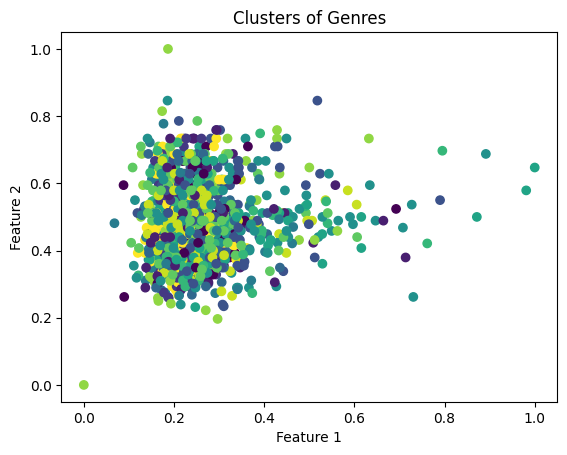

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Number of clusters (genres)
n_clusters = 13

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Plotting the clusters (optional, using the first two features for visualization)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Clusters of Genres")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

KMeans PCA

Silhouette Score (PCA-reduced data): 0.03029278906129036


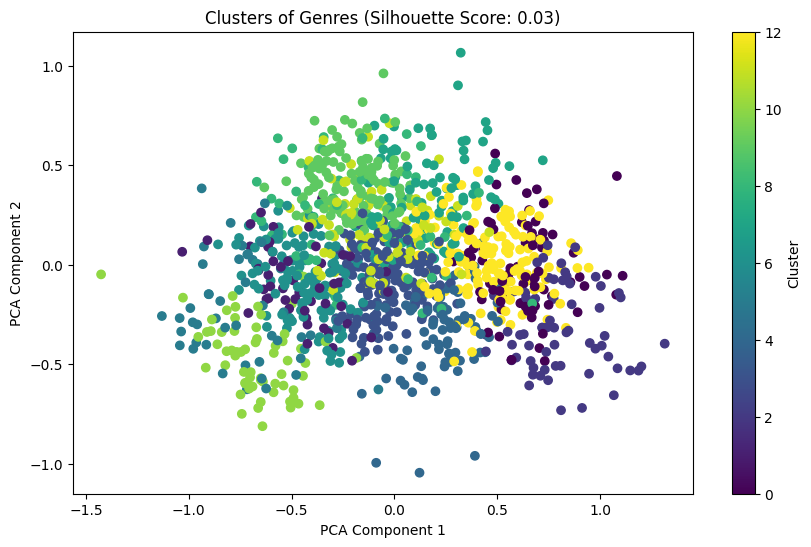

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Number of clusters (genres)
n_clusters = 13

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add cluster labels and PCA components to the dataset
data['cluster'] = kmeans.labels_
data['pca_1'] = X_pca[:, 0]
data['pca_2'] = X_pca[:, 1]

# Calculate silhouette score using PCA-reduced data
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score (PCA-reduced data): {silhouette_avg}")

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['pca_1'], data['pca_2'], c=data['cluster'], cmap='viridis')
plt.title(f"Clusters of Genres (Silhouette Score: {silhouette_avg:.2f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

t-SNE:

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Silhouette Score for t-SNE Clusters: 0.39011910557746887


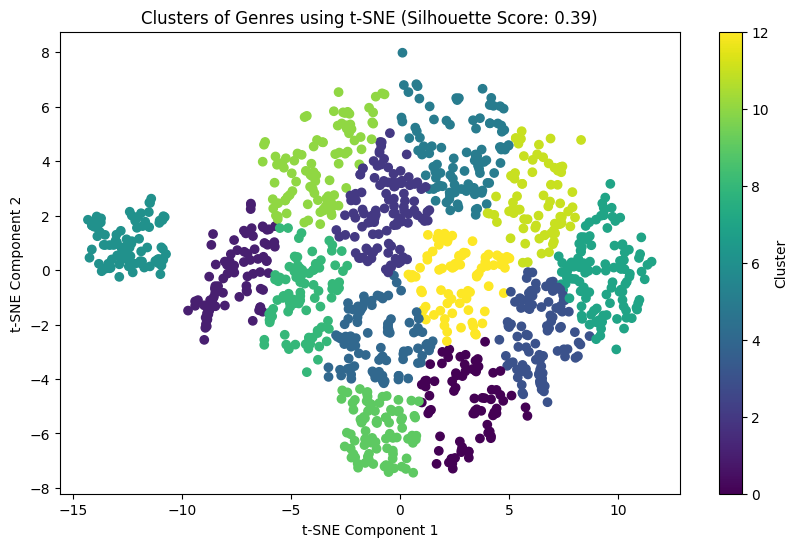

Actual Genre for the song 'Bee Gees - Stayin' Alive (Official Video).wav':
Disco
Rock
Genre Scores for the song 'Bee Gees - Stayin' Alive (Official Video).wav':
          Genre     Score
0   Alternative  0.367776
9           Pop  0.192655
3       Country  0.155989
4         Disco  0.145514
12         Rock  0.136154
7         K-Pop  0.100435
8         Metal  0.095024
2     Classical  0.093537
11       Reggae  0.092866
5       Hip-hop  0.083639
10          Rap  0.073895
1         Blues  0.073887
6          Jazz  0.054421


In [157]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Perform t-SNE on the dataset
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X)

# Perform K-means clustering on the t-SNE components
n_clusters = 13
kmeans_tsne = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_tsne.fit(X_tsne)

# Add the t-SNE components and new cluster labels to the dataset
data['tsne_1'] = X_tsne[:, 0]
data['tsne_2'] = X_tsne[:, 1]
data['tsne_cluster'] = kmeans_tsne.labels_

# Calculate silhouette score for the t-SNE based clusters
silhouette_avg_tsne = silhouette_score(X_tsne, kmeans_tsne.labels_)
print(f"Silhouette Score for t-SNE Clusters: {silhouette_avg_tsne}")

# Plot the clusters using t-SNE components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['tsne_1'], data['tsne_2'], c=data['tsne_cluster'], cmap='viridis')
plt.title(f"Clusters of Genres using t-SNE (Silhouette Score: {silhouette_avg_tsne:.2f})")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()


# Find the indices of the specific song
song_title = "Bee Gees - Stayin' Alive (Official Video).wav"
song_indices = data[data['song_name'] == song_title].index

# Extract genre scores for the specific song
# Assuming 'membership_probabilities' is derived from the t-SNE clusters, we need to redefine it
membership_probabilities = kmeans_tsne.transform(X_tsne)
membership_probabilities = 1 / (1 + membership_probabilities)  # Convert distances to probabilities

# Get the specific song's membership probabilities
genre_scores = membership_probabilities[song_indices[0]]

# Map numeric labels back to genre names using the saved mapping
genre_names = [label_mapping[i] for i in range(n_clusters)]

# Print the genre scores with genre names and actual genres
genre_df = pd.DataFrame({
    'Genre': genre_names,
    'Score': genre_scores
})
print(f"Actual Genre for the song '{song_title}':")
for song_index in song_indices:
    actual_genres = data.loc[song_index, 'genre']
    print(actual_genres)
print(f"Genre Scores for the song '{song_title}':")
print(genre_df.sort_values(by='Score', ascending=False))

Fuzzy Clustering


Silhouette Score for Fuzzy C-Means Clusters: 0.16623463231707658


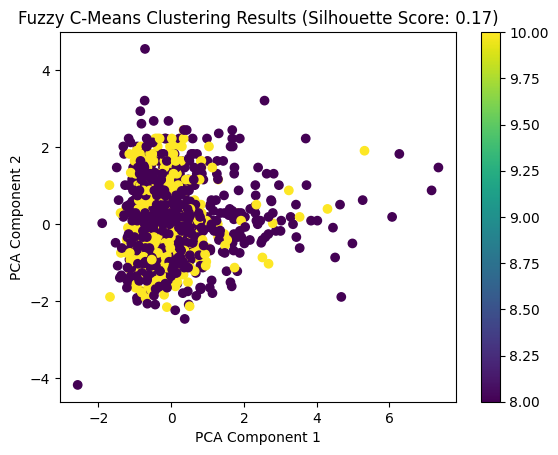

Actual Genre for the song 'Bee Gees - Stayin' Alive (Official Video).wav':
Disco
Rock
Genre Scores for the song 'Bee Gees - Stayin' Alive (Official Video).wav':
          Genre     Score
10          Rap  0.076923
0   Alternative  0.076923
12         Rock  0.076923
3       Country  0.076923
2     Classical  0.076923
1         Blues  0.076923
11       Reggae  0.076923
4         Disco  0.076923
9           Pop  0.076923
5       Hip-hop  0.076923
6          Jazz  0.076923
7         K-Pop  0.076923
8         Metal  0.076923


In [153]:
from fcmeans import FCM
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Normalize the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Fuzzy C-Means clustering
n_clusters = 13  # Adjust the number of clusters to match the number of genres
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(X_scaled)

# Get the membership probabilities
membership_probabilities = fcm.u
cluster_labels = np.argmax(membership_probabilities, axis=1)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for Fuzzy C-Means Clusters: {silhouette_avg}")

# Plot the clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title(f'Fuzzy C-Means Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Find the indices of the specific song
song_title = "Bee Gees - Stayin' Alive (Official Video).wav"
song_indices = data[data['song_name'] == song_title].index

# Extract genre scores for the specific song
genre_scores = membership_probabilities[song_index]

# Map numeric labels back to genre names using the saved mapping
genre_names = [label_mapping[i] for i in range(n_clusters)]

# Print the genre scores with genre names and actual genres
genre_df = pd.DataFrame({
    'Genre': genre_names,
    'Score': genre_scores
})
print(f"Actual Genre for the song '{song_title}':")
for song_index in song_indices:
  actual_genres = data.loc[song_index, 'genre']
  print(actual_genres)
print(f"Genre Scores for the song '{song_title}':")
print(genre_df.sort_values(by='Score', ascending=False))

Fuzzy Clustering with PCA

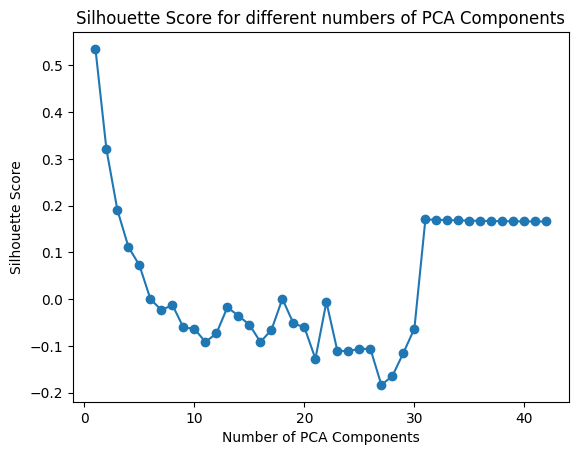

Optimal number of PCA components: 1
Final Silhouette Score: 0.5353092731437328


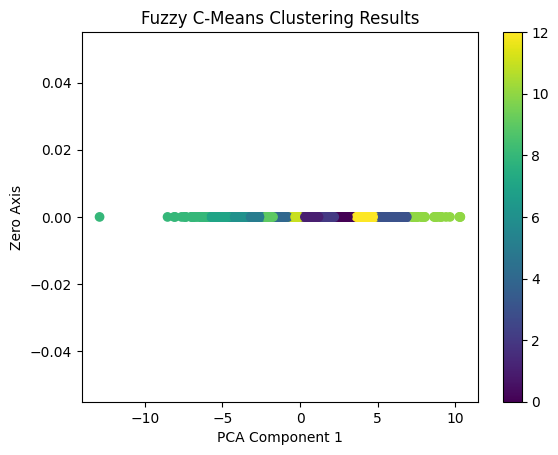

Actual Genre for the song 'Bee Gees - Stayin' Alive (Official Video).wav':
Disco
Rock
Genre Scores for the song 'Bee Gees - Stayin' Alive (Official Video).wav': 
          Genre     Score
1         Blues  0.718302
11       Reggae  0.152411
2     Classical  0.043494
4         Disco  0.031575
9           Pop  0.014072
0   Alternative  0.013676
5       Hip-hop  0.007464
12         Rock  0.005852
6          Jazz  0.004478
3       Country  0.002907
7         K-Pop  0.002769
8         Metal  0.001722
10          Rap  0.001279


In [154]:
from fcmeans import FCM
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Normalize the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
components_range = range(1, 43)

# Test different numbers of PCA components
for n_components in components_range:
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Perform Fuzzy C-Means clustering
    n_clusters = 13
    fcm = FCM(n_clusters=n_clusters, random_state=42)
    fcm.fit(X_pca)

    # Get the cluster labels
    cluster_labels = fcm.u.argmax(axis=1)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(components_range, silhouette_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different numbers of PCA Components')
plt.show()

# Choose the optimal number of PCA components based on the highest silhouette score
optimal_n_components = components_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of PCA components: {optimal_n_components}')

# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X_scaled)

# Perform Fuzzy C-Means clustering with the optimal number of components
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(X_pca)
membership_probabilities = fcm.u
cluster_labels = np.argmax(membership_probabilities, axis=1)

# Calculate the silhouette score for the final clustering
final_silhouette_score = silhouette_score(X_pca, cluster_labels)
print(f'Final Silhouette Score: {final_silhouette_score}')

# Plot the clustering results
if optimal_n_components > 1:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
else:
    plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('Zero Axis')

plt.title('Fuzzy C-Means Clustering Results')
plt.colorbar()
plt.show()

# Find the indices of the specific song
song_title = "Bee Gees - Stayin' Alive (Official Video).wav"
song_indices = data[data['song_name'] == song_title].index

# Extract genre scores for the specific song
genre_scores = membership_probabilities[song_indices[0]]

# Map numeric labels back to genre names using the saved mapping
genre_names = [label_mapping[i] for i in range(n_clusters)]

# Print the genre scores with genre names and actual genres
genre_df = pd.DataFrame({
    'Genre': genre_names,
    'Score': genre_scores
})
print(f"Actual Genre for the song '{song_title}':")
for song_index in song_indices:
  actual_genres = data.loc[song_index, 'genre']
  print(actual_genres)

print(f"Genre Scores for the song '{song_title}': ")
print(genre_df.sort_values(by='Score', ascending=False))

DBSCAN

Silhouette Score: -0.2291360217116497
              precision    recall  f1-score   support

 Alternative       0.00      0.00      0.00         5
       Blues       0.00      0.00      0.00         6
   Classical       0.50      1.00      0.67         1
     Country       0.15      0.94      0.26        18
       Disco       0.67      0.50      0.57         4
     Hip-hop       0.00      0.00      0.00         9
        Jazz       0.67      0.67      0.67         3
       K-Pop       0.00      0.00      0.00        13
       Metal       0.00      0.00      0.00        13
         Pop       0.00      0.00      0.00        24
         Rap       0.00      0.00      0.00         4
      Reggae       0.00      0.00      0.00         3
        Rock       0.00      0.00      0.00        17

    accuracy                           0.18       120
   macro avg       0.15      0.24      0.17       120
weighted avg       0.07      0.18      0.08       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


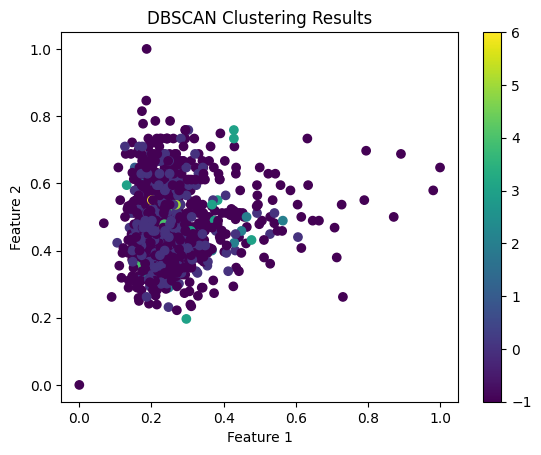

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, classification_report

# Assuming 'data' is already loaded
y = data['genre']  # genre variable
X = data.drop(columns=['genre', 'song_name'])  # select all columns but not the labels

# Encode the genre labels as numeric values
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'y_encoded' now contains numeric labels

# Save the mapping of numeric labels to original genre names
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Normalize the feature matrix X
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(np_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=0)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan.fit(X_train)

# Calculate silhouette score using the training data
silhouette_avg = silhouette_score(X_train, dbscan.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Get the cluster labels
cluster_labels = dbscan.labels_

# Predict genres based on clusters
def predict_genre(X_test, dbscan, X_train, y_train):
    from scipy.spatial import distance
    predictions = []
    for test_point in X_test.values:
        distances = distance.cdist([test_point], X_train.values, 'euclidean')
        nearest_cluster = dbscan.labels_[np.argmin(distances)]
        if nearest_cluster == -1:  # Handle noise points
            predictions.append(-1)
        else:
            cluster_indices = np.where(dbscan.labels_ == nearest_cluster)
            cluster_genres = y_train[cluster_indices]
            predicted_genre = np.bincount(cluster_genres).argmax()
            predictions.append(predicted_genre)
    return np.array(predictions)

# Predict genres for the test set
y_pred = predict_genre(X_test, dbscan, X_train, y_train)

# Remove noise points from evaluation
valid_indices = y_pred != -1
y_pred_genres = label_encoder.inverse_transform(y_pred[valid_indices])
y_test_genres = label_encoder.inverse_transform(y_test[valid_indices])

# Evaluate the predictions
print(classification_report(y_test_genres, y_pred_genres))

# Visualize the clusters
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

Autoencoder

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0521 - val_loss: 0.0506
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0508 - val_loss: 0.0498
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0502 - val_loss: 0.0491
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0497 - val_loss: 0.0486
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0492 - val_loss: 0.0481
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0489 - val_loss: 0.0477
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0483 - val_loss: 0.0473
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0479 - val_loss: 0.0471
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0475 - val_loss: 0.0468
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0471 - val_loss: 0.0465
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0469 - val_loss: 0.0463
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0468 - val_loss: 0.0460


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


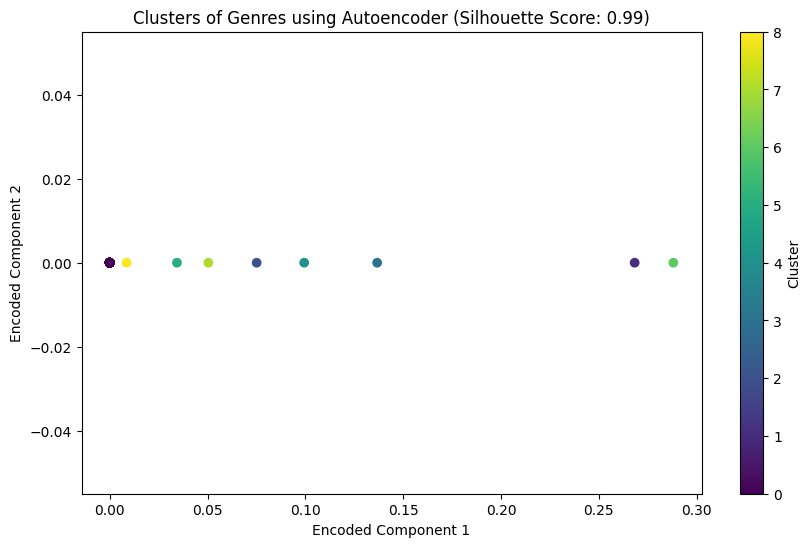

Actual Genre for the song 'Bee Gees - Stayin' Alive (Official Video).wav':
Disco
Rock
Genre Scores for the song 'Bee Gees - Stayin' Alive (Official Video).wav':
          Genre     Score
0   Alternative  1.000000
9           Pop  1.000000
10          Rap  1.000000
11       Reggae  1.000000
12         Rock  1.000000
8         Metal  0.991433
5       Hip-hop  0.966758
7         K-Pop  0.951991
2     Classical  0.930126
4         Disco  0.909580
3       Country  0.879725
1         Blues  0.788424
6          Jazz  0.776317


In [161]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Prepare the data
y = data['genre']
X = data.drop(columns=['genre', 'song_name'])

# Encode the genre labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Normalize the feature matrix
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=0)

# Define the Autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 2  # For 2D representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Reduce dimensions using the trained encoder
X_encoded_train = encoder.predict(X_train)
X_encoded_test = encoder.predict(X_test)

# Perform K-Means clustering on the encoded data
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_encoded_train)

# Calculate silhouette score for the Autoencoder-based clusters
silhouette_avg = silhouette_score(X_encoded_train, kmeans.labels_)
print(f"Silhouette Score for Autoencoder Clusters: {silhouette_avg}")

# Create a new DataFrame for the encoded data
encoded_data_train = pd.DataFrame(X_encoded_train, columns=['encoded_1', 'encoded_2'])
encoded_data_train['encoded_cluster'] = kmeans.labels_

# Plot the clusters using encoded components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(encoded_data_train['encoded_1'], encoded_data_train['encoded_2'], c=encoded_data_train['encoded_cluster'], cmap='viridis')
plt.title(f"Clusters of Genres using Autoencoder (Silhouette Score: {silhouette_avg:.2f})")
plt.xlabel("Encoded Component 1")
plt.ylabel("Encoded Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

# Find the indices of the specific song
song_title = "Bee Gees - Stayin' Alive (Official Video).wav"
song_indices = data[data['song_name'] == song_title].index

# Extract genre scores for the specific song
membership_probabilities = kmeans.transform(X_encoded_train)
membership_probabilities = 1 / (1 + membership_probabilities)  # Convert distances to probabilities

# Get the specific song's membership probabilities
genre_scores = membership_probabilities[song_indices[0]]

# Map numeric labels back to genre names
genre_names = [label_mapping[i] for i in range(n_clusters)]

# Print the genre scores with genre names and actual genres
genre_df = pd.DataFrame({
    'Genre': genre_names,
    'Score': genre_scores
})
print(f"Actual Genre for the song '{song_title}':")
for song_index in song_indices:
    actual_genres = data.loc[song_index, 'genre']
    print(actual_genres)
print(f"Genre Scores for the song '{song_title}':")
print(genre_df.sort_values(by='Score', ascending=False))

Accuracy : 0.52823 



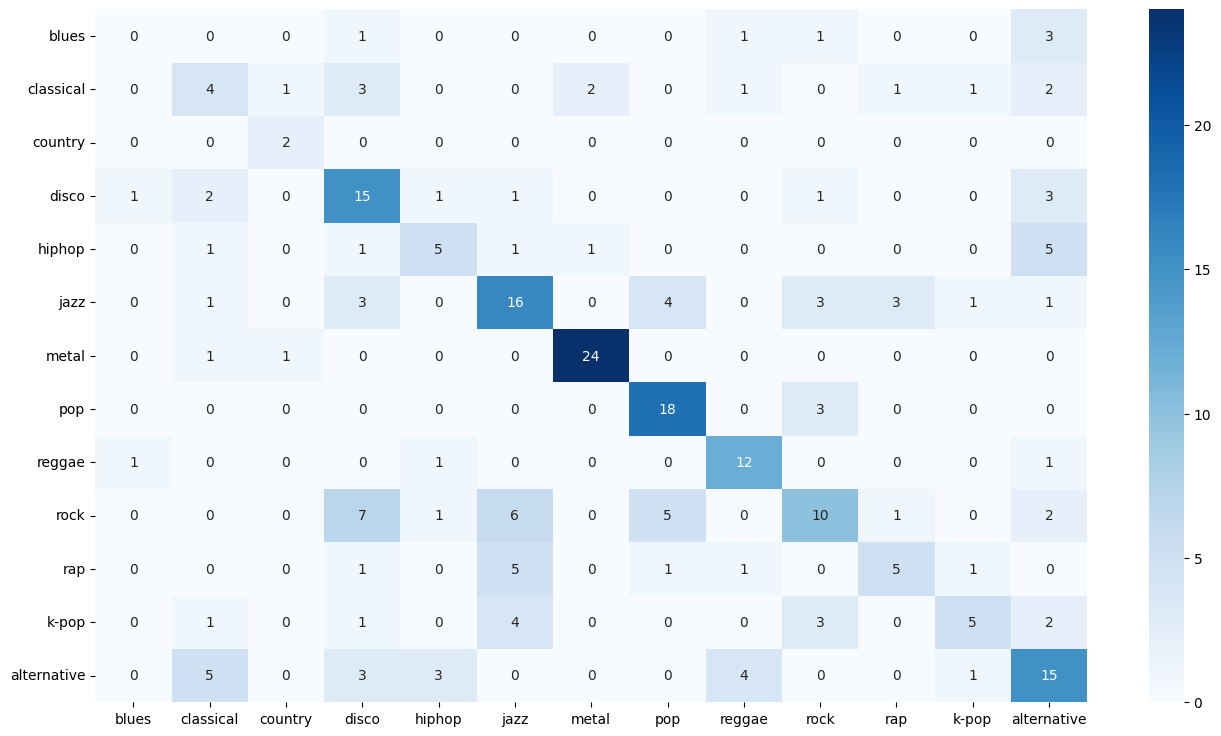

In [27]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix unnormalized
confusion_matr = confusion_matrix(y_test, preds)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock", "rap", "k-pop","alternative"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock", "rap", "k-pop","alternative"]);
plt.savefig("conf matrix")

Accuracy : 0.52823 



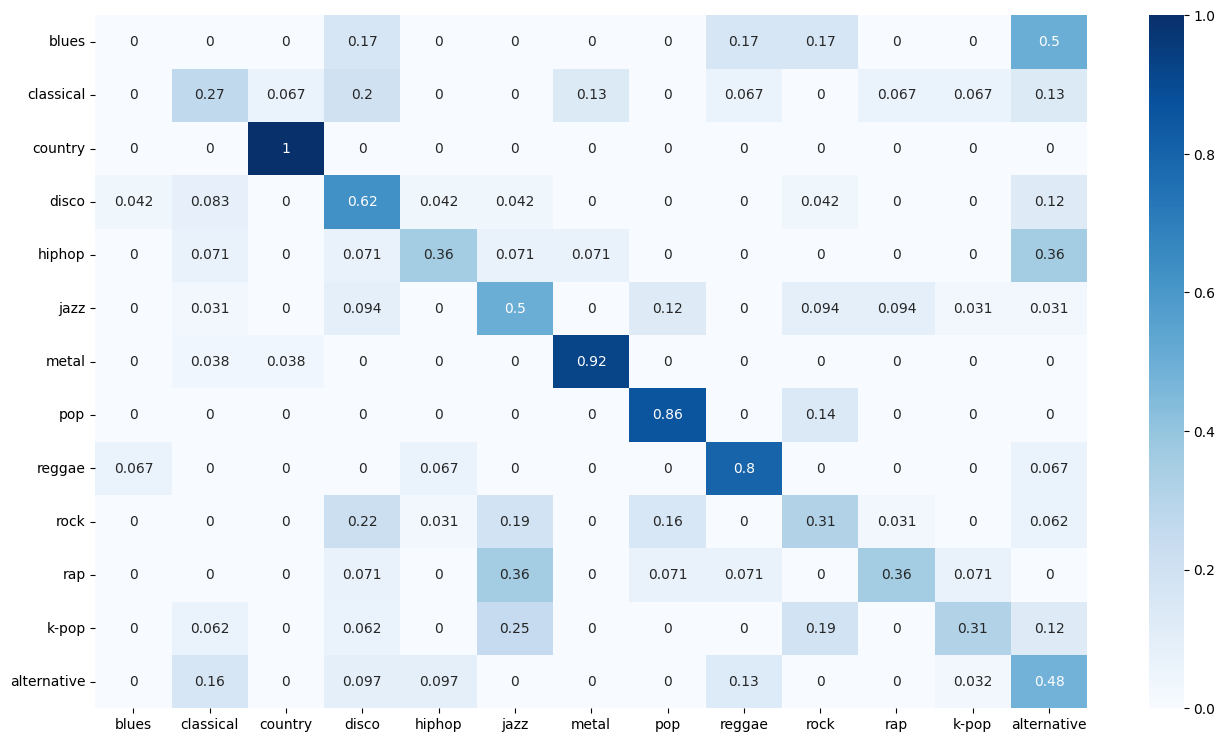

In [28]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix normalized
confusion_matr = confusion_matrix(y_test, preds, normalize = 'true') #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock", "rap", "k-pop","alternative"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock", "rap", "k-pop","alternative"]);
plt.savefig("conf matrix")